
Naive Bayes Performance:
Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Logistic Regression Performance:
Accuracy: 0.9704035874439462
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


SVM Performance:
Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.88      0.93       149

    accuracy     

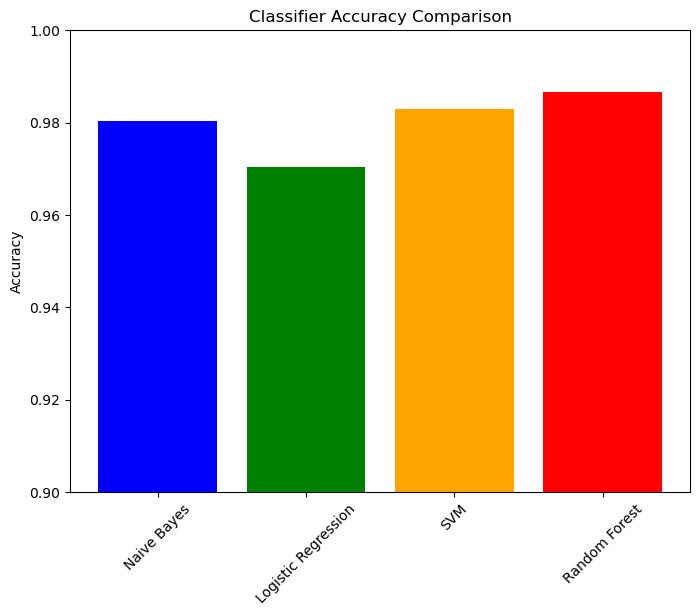


Best Model: Random Forest


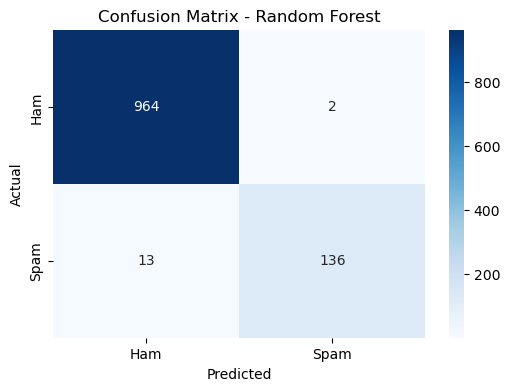

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

# Load and preprocess the dataset
file_path = 'spam.csv'  # Update this path if necessary
data = pd.read_csv(file_path, encoding='latin1')
data = data.rename(columns={'v1': 'label', 'v2': 'message'})  # Rename columns for clarity
data = data[['label', 'message']]  # Keep only relevant columns
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Encode labels: ham (0), spam (1)

# Shuffle dataset to avoid bias
data = shuffle(data, random_state=42)

# Text preprocessing and TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

# Split the data
X = data['message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluate each model
results = {}
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('tfidf', tfidf),
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    results[name] = accuracy

# Compare accuracy across classifiers
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)
plt.show()

# Confusion Matrix for the Best Model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name}")
best_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('classifier', classifiers[best_model_name])
])
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
